In [1]:
!pip install mediapipe opencv-python

In [2]:
pip install --upgrade mediapipe

In [6]:
import cv2
import mediapipe as mp
import numpy as np
import math
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [4]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Workout Session', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [79]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.2, min_tracking_confidence=0.2) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Workout session', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [6]:
#Record video for detection to be used
cap = cv2.VideoCapture(0)

height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
fps = cap.get (cv2.CAP_PROP_FPS)
videoWriter = cv2.VideoWriter('newsquatvid40.avi', cv2.VideoWriter_fourcc('P', 'I', 'M', '1'), fps, (int (width), int(height)))

while cap.isOpened():
    ret, frame = cap.read()
    
    try:
        cv2.imshow('Workout Session', frame)
        videoWriter.write(frame)
    except Exception as e:
        break
        
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
videoWriter.release()
cv2.destroyAllWindows()

In [12]:
#Capture lanmarks and exporting to csv

import csv
import os
import numpy as np
from matplotlib import pyplot as plt

In [13]:
landmarks = ['class']
for val in range(1, 33+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [9]:
landmarks[1:]

['x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 'x33',
 'y3

In [14]:
results.pose_landmarks

landmark {
  x: 0.6407584547996521
  y: 0.32681703567504883
  z: -1.3945181369781494
  visibility: 0.9995033740997314
}
landmark {
  x: 0.6654624342918396
  y: 0.2493239790201187
  z: -1.2863614559173584
  visibility: 0.999110758304596
}
landmark {
  x: 0.6849583387374878
  y: 0.24944257736206055
  z: -1.2866127490997314
  visibility: 0.9991567730903625
}
landmark {
  x: 0.7004382014274597
  y: 0.2510543763637543
  z: -1.2866365909576416
  visibility: 0.9989836812019348
}
landmark {
  x: 0.5923985242843628
  y: 0.2599916160106659
  z: -1.2895138263702393
  visibility: 0.9994819164276123
}
landmark {
  x: 0.5673342943191528
  y: 0.2675338387489319
  z: -1.2881269454956055
  visibility: 0.9995924830436707
}
landmark {
  x: 0.5443212389945984
  y: 0.2788143754005432
  z: -1.2883280515670776
  visibility: 0.9995639324188232
}
landmark {
  x: 0.7204000353813171
  y: 0.2991986870765686
  z: -0.6995197534561157
  visibility: 0.9990711212158203
}
landmark {
  x: 0.5186777114868164
  y: 0.33671

In [11]:
with open('workoutnewdata4.csv', mode='a', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [12]:
def export_landmark(results, action):
    try:
        keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
        keypoints.insert(0, action)

        with open('workoutnewdata4.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)
    except Exception as e:
        pass

In [13]:
export_landmark(results, 'correct')

In [14]:
cap = cv2.VideoCapture('newsquatvid.avi')

# Holistic model to capture data
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Recolour feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(128, 117, 66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(128, 66, 230), thickness=2, circle_radius=2)
                                  )

        k = cv2.waitKey(1)
        if k == 99:
            export_landmark(results, 'correct')  # Replace with your implementation of export_landmark()
        if k == 105:
            export_landmark(results, 'incorrect')  # Replace with your implementation of export_landmark()

        cv2.imshow('Workout Session', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [44]:
#Train custom model
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('workoutnewdata4.csv')

In [43]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,correct,0.625114,0.769298,-1.202454,0.983846,0.657646,0.698359,-1.134694,0.977109,0.679393,...,0.396652,0.000164,0.751819,3.367023,-0.043866,0.000312,0.557447,3.380967,-0.327505,0.000454
1,incorrect,0.547040,0.229146,-0.347180,0.999986,0.553245,0.214585,-0.327729,0.999948,0.557225,...,0.159467,0.849368,0.648625,0.934735,-0.006456,0.984025,0.520247,0.950043,-0.006311,0.985645
2,incorrect,0.543439,0.227582,-0.309038,0.999978,0.548555,0.213357,-0.287890,0.999922,0.552319,...,0.130098,0.835526,0.645445,0.934546,-0.011368,0.982727,0.522576,0.947483,-0.034399,0.984206
3,incorrect,0.554896,0.229622,-0.359108,0.999986,0.561289,0.215508,-0.340371,0.999953,0.565369,...,0.122711,0.844364,0.641935,0.937996,-0.025532,0.982325,0.511897,0.953064,-0.044617,0.984630
4,incorrect,0.550245,0.243152,-0.359749,0.999987,0.556047,0.226724,-0.341048,0.999955,0.560307,...,0.134947,0.845476,0.642791,0.936266,-0.002295,0.982583,0.513943,0.952020,-0.032799,0.984910


In [40]:
df.describe()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.565562,0.335080,-0.168752,0.999912,0.571458,0.321281,-0.146702,0.999876,0.575380,0.321112,...,-0.034807,0.872555,0.649353,0.950778,-0.181804,0.980068,0.523322,0.960383,-0.178787,0.981422
std,0.027365,0.106301,0.097281,0.001159,0.028918,0.104649,0.095239,0.001643,0.029159,0.104580,...,0.125615,0.079576,0.007948,0.174404,0.143776,0.070830,0.004199,0.174711,0.120139,0.070913
min,0.488886,0.219315,-1.202454,0.983846,0.490574,0.205739,-1.134694,0.977109,0.494175,0.205417,...,-0.419196,0.000164,0.640455,0.930504,-0.581995,0.000312,0.511897,0.941274,-0.576255,0.000454
25%,0.559392,0.252504,-0.187619,0.999994,0.564458,0.240096,-0.168019,0.999994,0.568282,0.239959,...,-0.147209,0.850137,0.647330,0.935894,-0.299383,0.983189,0.521328,0.945720,-0.271493,0.984565
50%,0.568036,0.296412,-0.151411,0.999997,0.574752,0.285014,-0.130410,0.999997,0.579009,0.283895,...,0.019134,0.887932,0.648887,0.938000,-0.111680,0.985773,0.523208,0.947846,-0.125046,0.987087
75%,0.575669,0.412070,-0.121723,0.999998,0.582273,0.397625,-0.099703,0.999998,0.586149,0.397431,...,0.059904,0.912048,0.650801,0.940316,-0.069397,0.987969,0.525540,0.949607,-0.085582,0.989176
max,0.638449,0.769298,-0.058723,1.000000,0.657646,0.698359,-0.035767,1.000000,0.679393,0.696263,...,0.396652,0.951850,0.751819,3.367023,0.005086,0.993085,0.557447,3.380967,-0.004180,0.994543


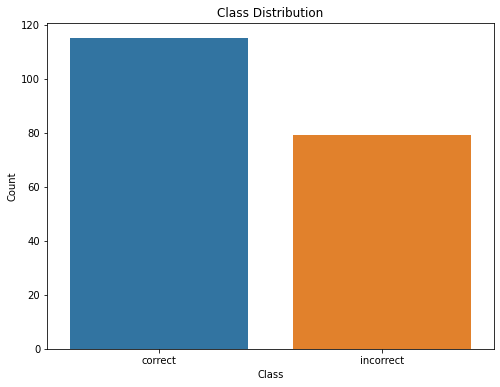

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [19]:
df.shape

(194, 133)

In [20]:
df[df['class']=='correct']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,correct,0.625114,0.769298,-1.202454,0.983846,0.657646,0.698359,-1.134694,0.977109,0.679393,...,0.396652,0.000164,0.751819,3.367023,-0.043866,0.000312,0.557447,3.380967,-0.327505,0.000454
10,correct,0.555651,0.230132,-0.081699,0.999998,0.559749,0.220088,-0.055200,0.999996,0.563123,...,0.036901,0.810968,0.647839,0.934931,-0.111313,0.981632,0.525967,0.946282,-0.119277,0.981558
11,correct,0.556213,0.230624,-0.099344,0.999999,0.560011,0.220551,-0.071745,0.999998,0.563207,...,0.035705,0.801214,0.648199,0.934779,-0.084826,0.978560,0.526675,0.945393,-0.120508,0.978912
12,correct,0.559192,0.231109,-0.101331,0.999999,0.561908,0.220519,-0.074982,0.999999,0.564746,...,0.036931,0.794357,0.647980,0.935464,-0.082800,0.977218,0.527577,0.945690,-0.122591,0.977669
13,correct,0.555505,0.255824,-0.196384,0.999999,0.561112,0.242162,-0.175356,1.000000,0.564403,...,0.065646,0.836241,0.645202,0.930504,-0.091598,0.985205,0.524275,0.945538,-0.088759,0.986535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,correct,0.569675,0.272712,-0.185613,0.999990,0.576603,0.256696,-0.171438,0.999990,0.580982,...,0.064297,0.894271,0.649712,0.940036,-0.063231,0.983437,0.521529,0.947710,-0.065426,0.985699
181,correct,0.567704,0.235299,-0.152183,0.999991,0.574873,0.218902,-0.130685,0.999991,0.579515,...,0.076552,0.893787,0.646879,0.935573,-0.069316,0.985976,0.523217,0.948126,-0.077685,0.987832
182,correct,0.564543,0.222806,-0.148779,0.999991,0.570769,0.208602,-0.126745,0.999991,0.575346,...,0.079421,0.887767,0.646721,0.938008,-0.064493,0.987775,0.526586,0.948206,-0.080932,0.989081
183,correct,0.565028,0.225640,-0.164181,0.999992,0.570631,0.210467,-0.142907,0.999992,0.575013,...,0.074223,0.885247,0.646680,0.938196,-0.079261,0.988951,0.526566,0.945752,-0.077532,0.990019


In [21]:
X = df.drop('class', axis=1)
y = df['class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [23]:
y_test

101    incorrect
51       correct
146      correct
153      correct
106    incorrect
59       correct
160    incorrect
169      correct
191    incorrect
88       correct
29       correct
130    incorrect
66     incorrect
74     incorrect
48       correct
100    incorrect
123      correct
31     incorrect
95       correct
137      correct
6      incorrect
54       correct
97     incorrect
5      incorrect
110      correct
91       correct
134    incorrect
178      correct
7      incorrect
167      correct
94       correct
9      incorrect
58       correct
92       correct
111      correct
43       correct
77       correct
142      correct
119      correct
40     incorrect
114      correct
185    incorrect
39     incorrect
25       correct
131    incorrect
135    incorrect
99     incorrect
17       correct
11       correct
102    incorrect
129    incorrect
165    incorrect
172      correct
104    incorrect
108    incorrect
121      correct
27       correct
65     incorrect
157    incorre

In [24]:
#train machine learning classification model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [49]:
pipelines= {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [50]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [51]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [52]:
fit_models['rc'].predict(X_test)

array(['incorrect', 'correct', 'correct', 'correct', 'incorrect',
       'correct', 'incorrect', 'correct', 'incorrect', 'correct',
       'correct', 'incorrect', 'incorrect', 'incorrect', 'correct',
       'incorrect', 'correct', 'correct', 'correct', 'correct',
       'incorrect', 'correct', 'correct', 'incorrect', 'correct',
       'correct', 'incorrect', 'correct', 'incorrect', 'correct',
       'correct', 'incorrect', 'correct', 'correct', 'correct', 'correct',
       'correct', 'correct', 'correct', 'incorrect', 'correct',
       'incorrect', 'incorrect', 'correct', 'incorrect', 'correct',
       'incorrect', 'correct', 'correct', 'incorrect', 'incorrect',
       'incorrect', 'correct', 'incorrect', 'correct', 'correct',
       'correct', 'incorrect', 'incorrect'], dtype='<U9')

In [3]:
#Evaluate and serialize model
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle 

In [54]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test.values, yhat),
         precision_score(y_test.values, yhat, average="binary", pos_label="correct"),
         recall_score(y_test.values,yhat,average="binary", pos_label= "correct"))

lr 0.9661016949152542 0.967741935483871 0.967741935483871
rc 0.9322033898305084 0.8857142857142857 1.0
rf 0.9322033898305084 0.8857142857142857 1.0
gb 0.9830508474576272 0.96875 1.0


In [65]:
yhat = fit_models['rc'].predict(X_test)

In [66]:
yhat[:10]

array(['incorrect', 'correct', 'correct', 'correct', 'incorrect',
       'correct', 'incorrect', 'correct', 'incorrect', 'correct'],
      dtype='<U9')

In [72]:
with open('squatdata112.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [16]:
#making predicitions with model
with open('squatdata112.pkl', 'rb') as f:
    model = pickle.load(f)

In [11]:
cap = cv2.VideoCapture(0)
counter = 0
current_form = ''
# Initiating holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=4)
                                 )
        try:
            row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([row], columns=landmarks[1:])
            body_language_class = loaded_model.predict(X)[0]
            body_language_prob = loaded_model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)


            if body_language_class == "incorrect" and body_language_prob[body_language_prob.argmax()] >= .7:
                current_form = "incorrect"
            elif current_form == "incorrect" and body_language_class == "correct" and body_language_prob[body_language_prob.argmax()] <= .7:
                current_form = "correct"
                counter +=1
                print(current_form)
                
            # Get status box
            cv2.rectangle(image, (0, 0), (250, 60), (245,117,16), -1)
            
            # Display class
            cv2.putText(image, 'FORM'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display probability
            cv2.putText(image, 'PROB'
                        , (15,12 -20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display count
            cv2.putText(image, 'COUNT'
                        , (180,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter)
                        , (175,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
        except Exception as e:
            pass
        
        cv2.imshow('Workout Session', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

In [17]:
cap = cv2.VideoCapture(0)
counter = 0
current_form = ''
# Initiating holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(128, 117, 66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(128, 66, 230), thickness=2, circle_radius=2)
                                 )
        try:
            row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([row], columns=landmarks[1:])
            
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            
            if body_language_class == 'incorrect' and body_language_prob[body_language_prob.argmax()] >= 0.7:
                current_form = 'incorrect'
            elif current_form == 'incorrect' and body_language_class == 'correct' and body_language_prob[body_language_prob.argmax()] <= 0.7:
                current_form = 'correct'
                counter += 1
                print(current_form)
                
            # Get status box
            cv2.rectangle(image, (0, 0), (300, 60), (245, 117, 16), -1)
            
            # Display class
            cv2.putText(image, 'FORM', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0], (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display probability
            cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display count
            cv2.putText(image, 'COUNT', (240, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter), (260, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except Exception as e:
            pass
        
        cv2.imshow('Workout Session', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()